In [29]:
import star_trek_tos_data as TOS
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
guest_stars = TOS.guest_stars
main_cast_ids = [id_num for id_num in TOS.main_cast_stars]
star_trek_episodes = TOS.star_trek_tos


In [3]:
name_dict = {}
for guest_id in guest_stars:
    name_dict[guest_stars[guest_id]['name']] = guest_id
#TOS.guest_stars[guest_id]['name']
name_dict

{'Abraham Sofaer': 135066,
 'Adam Roarke': 39770,
 'Alan Bergman': 1244929,
 'Alfred Ryder': 15620,
 'Alice Rawlings': 1769187,
 'Alyce Andrece': 1768219,
 'Andrea Dromm': 1214883,
 'Angelique Pettyjohn': 98241,
 'Anna Karen': 84360,
 'Anthony Caruso': 16004,
 'Anthony D. Call': 1556119,
 'Antoinette Bower': 15961,
 'Arlene Martel': 152660,
 'Arnold Moss': 15676,
 'Arthur Batanides': 151511,
 'BarBara Luna': 15950,
 'Barbara Anderson': 161255,
 'Barbara Babcock': 15746,
 'Barbara Baldavin': 1768121,
 'Barbara Bouchet': 16021,
 'Barry Atwater': 16125,
 'Barry Russo': 151491,
 'Bart La Rue': 1190321,
 'Ben Gage': 1214916,
 'Beverly Washburn': 15983,
 'Biff Elliot': 41719,
 'Bill Bradley': 1315468,
 'Bill Zuckert': 16070,
 'Billy Curtis': 102426,
 'Bob Herron': 1016007,
 'Bob Johnson': 1214921,
 'Bobby Bass': 16659,
 'Bonnie Beecher': 1768643,
 'Booker Bradshaw': 151402,
 'Brad Weston': 15756,
 'Brian Tochi': 16060,
 'Bruce Hyde': 1214878,
 'Bruce Mars': 157282,
 'Bruce Watson': 15621,
 '

In [4]:
for season_num in [1,2,3]:
    for episode_num in TOS.star_trek_tos[str(season_num)]:
        print(TOS.star_trek_tos[str(season_num)][episode_num]['vote_average'])

7.25
6.778
6.625
6.5
7.125
6.5
7.143
6.4
6.667
7.2
7.857
8.0
6.0
8.0
6.0
7.0
7.167
6.8
6.6
6.5
7.5
8.167
7.0
7.2
7.167
6.6
5.5
8.125
8.0
6.4
6.5
8.167
6.25
7.571
5.833
7.2
6.333
7.667
7.0
7.0
6.833
5.75
7.2
7.333
6.75
7.4
6.6
6.8
7.4
7.667
6.4
7.0
6.833
5.5
7.167
7.063
5.375
7.0
7.0
7.286
6.5
7.0
7.167
7.167
5.8
6.571
7.2
6.4
6.4
6.4
7.0
6.2
6.2
5.8
6.6
6.5


In [5]:
for season_num in [1,2,3]:
    for episode_num in TOS.star_trek_tos[str(season_num)]:
        guests_per_episode = []
        #print(json.dumps(TOS.star_trek_tos[str(season_num)][episode_num], indent = 4, sort_keys = True))
        episode = TOS.star_trek_tos[str(season_num)][episode_num]
        
        for guest in episode['guest_stars']:
            if guest['id'] not in main_cast_ids:
                try:
                    guests_per_episode.append(TOS.guest_stars[guest['id']])
                        
                except KeyError:
                    guests_per_episode.append(TOS.guest_stars[name_dict[guest['name']]])
                
        star_trek_episodes[str(season_num)][episode_num]['guest_star_ids'] = guests_per_episode
        
TOS.guest_stars[guest['id']]

{'adult': False,
 'also_known_as': [],
 'biography': 'From Wikipedia, the free encyclopedia.\n\nMary Loretta "Mariette" Hartley (born June 21, 1940) is an American character actress.\n\nDescription above from the Wikipedia article Mariette Hartley, licensed under CC-BY-SA, full list of contributors on Wikipedia.',
 'birthday': '1940-06-21',
 'credits': {'cast': [{'adult': False,
    'backdrop_path': '/bskL6AmfHEOUP1WXWpJR3HUP7aW.jpg',
    'character': 'Susan Clabon',
    'credit_id': '52fe424bc3a36847f8013209',
    'genre_ids': [80, 18, 9648, 53],
    'id': 506,
    'original_language': 'en',
    'original_title': 'Marnie',
    'overview': 'Marnie is a beautiful kleptomaniac who is in love with businessman Mark Rutland. Marnie who is a compulsive thief is being watched by her new boss Mark who suspects her of stealing from him and thus decides to blackmail her in the most unusual way. A psychological thriller from Alfred Hitchcock based on a novel of the same name by Winston Graham.',


In [33]:
correlation_dict = {}
print(json.dumps(TOS.guest_stars[16131], indent = 4, sort_keys = True))
for season_num in [1,2,3]:
    for episode_num in star_trek_episodes[str(season_num)]:
        episode = star_trek_episodes[str(season_num)][episode_num]
        
        movie_list = []
        for star in episode['guest_star_ids']:
            for movie_dat in TOS.guest_stars[star['id']]['credits']['cast']:
                
                if movie_dat['vote_average'] > 0 and movie_dat['vote_average'] < 10 and movie_dat['vote_count'] > 10:
                    movie_list.append(movie_dat['vote_average'])
        star_trek_episodes[str(season_num)][episode_num]['average_movie_vote'] = mean(movie_list)
        if len(movie_list) > 1:
            #print(season_num, 'x',episode_num, ' - ', episode['vote_average'], '-' , mean(movie_list))
            correlation_dict[str(season_num)+'x'+str(episode_num)] = {}
            correlation_dict[str(season_num)+'x'+str(episode_num)]['episode_score'] = episode['vote_average']
            correlation_dict[str(season_num)+'x'+str(episode_num)]['mean_movie_score'] = np.mean(movie_list)
            correlation_dict[str(season_num)+'x'+str(episode_num)]['max_movie_score'] = np.max(movie_list)
            correlation_dict[str(season_num)+'x'+str(episode_num)]['median_movie_score'] = np.median(movie_list)
print(correlation_dict)

{
    "adult": false,
    "also_known_as": [],
    "biography": "From Wikipedia, the free encyclopedia.\n\nMary Loretta \"Mariette\" Hartley (born June 21, 1940) is an American character actress.\n\nDescription above from the Wikipedia article Mariette Hartley, licensed under CC-BY-SA, full list of contributors on Wikipedia.",
    "birthday": "1940-06-21",
    "credits": {
        "cast": [
            {
                "adult": false,
                "backdrop_path": "/bskL6AmfHEOUP1WXWpJR3HUP7aW.jpg",
                "character": "Susan Clabon",
                "credit_id": "52fe424bc3a36847f8013209",
                "genre_ids": [
                    80,
                    18,
                    9648,
                    53
                ],
                "id": 506,
                "original_language": "en",
                "original_title": "Marnie",
                "overview": "Marnie is a beautiful kleptomaniac who is in love with businessman Mark Rutland. Marnie who is a co

/Users/nicksteinhauser/anaconda/envs/pydata/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nicksteinhauser/anaconda/envs/pydata/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


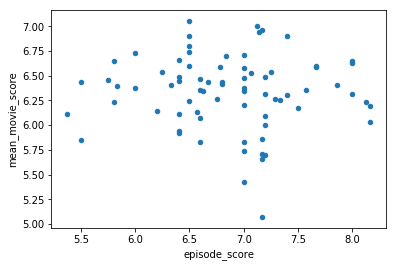

In [28]:
pd.DataFrame(correlation_dict).T.plot('episode_score', 'mean_movie_score', kind = 'scatter')

plt.show()

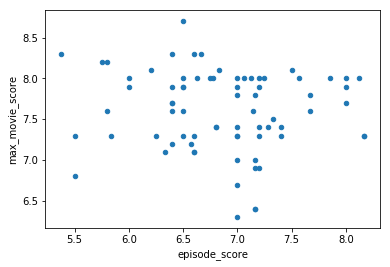

In [32]:
pd.DataFrame(correlation_dict).T.plot('episode_score', 'max_movie_score', kind = 'scatter')

plt.show()

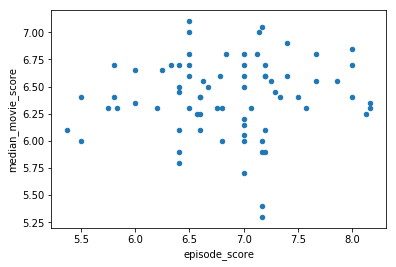

In [34]:
pd.DataFrame(correlation_dict).T.plot('episode_score', 'median_movie_score', kind = 'scatter')

plt.show()